In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

## Loading Data

In [2]:
df=pd.read_csv('/Users/dexter/Training/data.csv')

In [3]:
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [4]:
df.shape

(1159764, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159749 non-null  object 
 2   track_name        1159763 non-null  object 
 3   track_id          1159764 non-null  object 
 4   popularity        1159764 non-null  int64  
 5   year              1159764 non-null  int64  
 6   genre             1159764 non-null  object 
 7   danceability      1159764 non-null  float64
 8   energy            1159764 non-null  float64
 9   key               1159764 non-null  int64  
 10  loudness          1159764 non-null  float64
 11  mode              1159764 non-null  int64  
 12  speechiness       1159764 non-null  float64
 13  acousticness      1159764 non-null  float64
 14  instrumentalness  1159764 non-null  float64
 15  liveness          1159764 non-null  float64
 16  

##### The unnamed column is useless. So, removing it.

In [6]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [7]:
df.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


## Exploratory Data Analysis

#### Top 5 popular artists

In [9]:
popular_artists=df.groupby('artist_name')['popularity'].mean().sort_values(ascending=False).head(5)
popular_artists

artist_name
NewJeans          85.333333
Elley Duhé        85.000000
Rema              80.666667
SunKissed Lola    80.000000
Fujii Kaze        80.000000
Name: popularity, dtype: float64

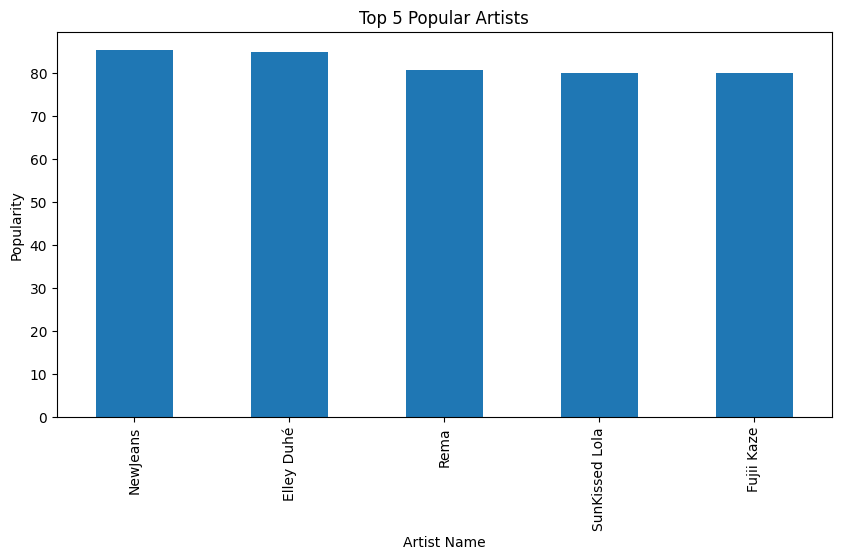

In [10]:
#visualizing the top 5 popular artists
popular_artists.plot(kind='bar',figsize=(10,5),xlabel='Artist Name',ylabel='Popularity',title='Top 5 Popular Artists')
plt.show()

#### Top 5 popular songs

In [11]:
popular_songs=df.groupby('track_name')['popularity'].mean().sort_values(ascending=False).head(5)
popular_songs

track_name
Shakira: Bzrp Music Sessions, Vol. 53    96.0
Die For You - Remix                      95.0
Calm Down (with Selena Gomez)            93.0
La Bachata                               93.0
Unholy (feat. Kim Petras)                92.0
Name: popularity, dtype: float64

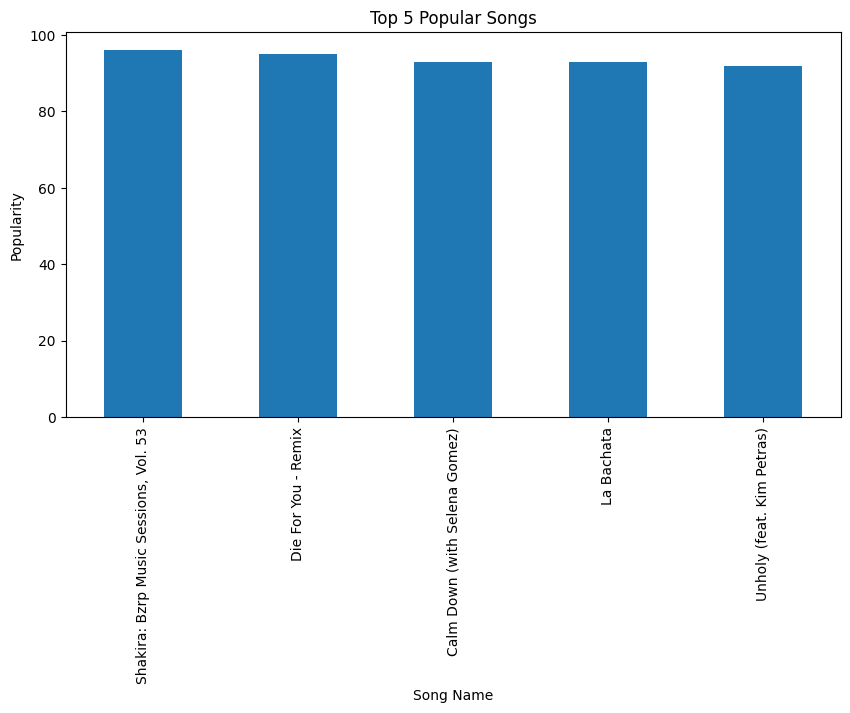

In [12]:
#visualizing the top 5 popular songs
popular_songs.plot(kind='bar',figsize=(10,5),xlabel='Song Name',ylabel='Popularity',title='Top 5 Popular Songs')
plt.show()

#### Top 5 trending genre

In [13]:
trending_genres=df.groupby('genre')['popularity'].mean().sort_values(ascending=False).head(5)
trending_genres

genre
pop        55.685806
hip-hop    46.315736
rock       46.228985
dance      43.034337
metal      39.698860
Name: popularity, dtype: float64

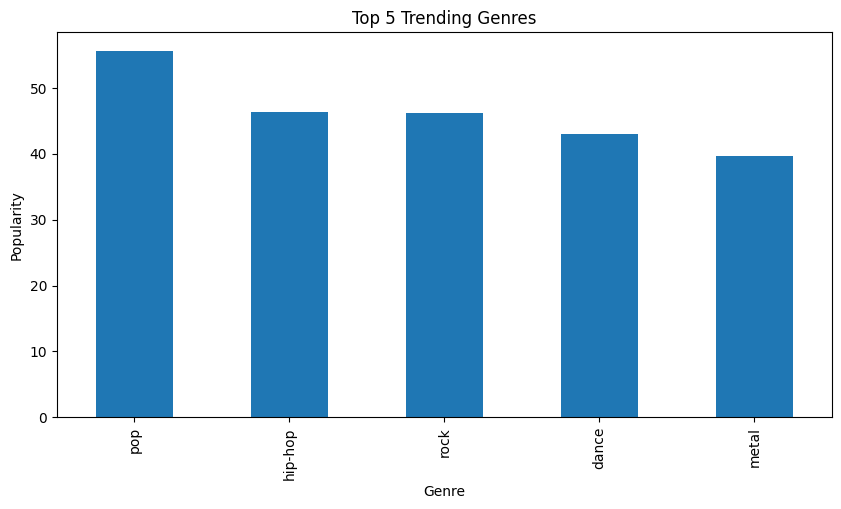

In [14]:
trending_genres.plot(kind='bar',figsize=(10,5),xlabel='Genre',ylabel='Popularity',title='Top 5 Trending Genres')
plt.show()

#### Top 5 longest songs of the top 5 popular artists

In [15]:
#top 5 longest songs in the dataset
longest_songs=df[['track_name','duration_ms']].sort_values(by='duration_ms',ascending=False)[:5]
longest_songs

,track_name,duration_ms
157171,Babbling Brook Close Up,6000495
103376,Rainstorm Ambience with Thunder Rolls and Peels,6000461
103634,Tranquil Rain Shower Ambience,6000328
103697,Beachside Rolling Wave Ambience,6000161
103592,Constant Small Waterfall Stream,6000061


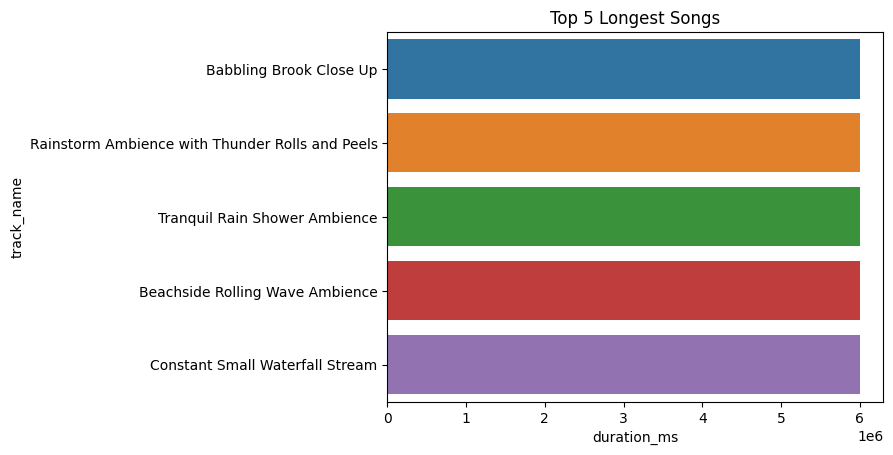

In [16]:
sns.barplot(x='duration_ms',y='track_name',data=longest_songs)
plt.title('Top 5 Longest Songs')
plt.show()

#### Top 5 most danceable songs

In [17]:
dance_songs=df[['track_name','danceability']].sort_values(by='danceability',ascending=False)[:5]
dance_songs

,track_name,danceability
1053853,Roll Like Dis / Cha-cha Slide Part 2,0.993
934348,Hospitality,0.992
1005329,Close the Door,0.992
123090,Royal Insanity,0.991
37083,Trombone,0.991


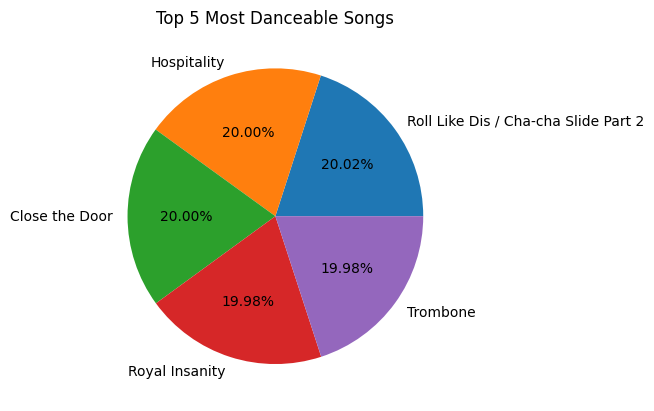

In [18]:
plt.pie(x="danceability", data=dance_songs, autopct='%1.2f%%', labels=dance_songs.track_name)
plt.title("Top 5 Most Danceable Songs")
plt.show()

In [19]:
df.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


## Pipeline

In [22]:
X=df.drop(['popularity'],axis=1)
y=df['popularity']

In [23]:
from sklearn.impute import SimpleImputer

num_processor = Pipeline(steps=[('imputer', SimpleImputer(missing_values= np.nan, strategy='mean')),('scaler',MinMaxScaler())])
cat_processor= Pipeline(steps=[('imputer', SimpleImputer(fill_value="unknwon",strategy='constant')),('onehot',OneHotEncoder(handle_unknown='ignore'))])

In [24]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [25]:
from sklearn.compose import ColumnTransformer

preprocessor=ColumnTransformer([("categorical",cat_processor,categorical_cols),
                   ("numerical",num_processor,numerical_cols)])

preprocessor

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='unknwon',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['artist_name', 'track_name', 'track_id', 'genre'], dtype='object')),
                                ('numerical',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 Index(['year', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object'))])

In [26]:
from sklearn.pipeline import make_pipeline
final_pipeline = Pipeline([('preprocessing', preprocessor),('kbest',SelectKBest(chi2,k=5)), ('model', DecisionTreeRegressor(max_depth=10,min_samples_split=5,min_samples_leaf=10))])
final_pipeline 

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='unknwon',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['artist_name', 'track_name', 'track_id', 'genre'], dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scal...
                                                                   MinMaxScaler())]),
                                                  Index(['year', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object'))])),
                ('kbest',
                 SelectKBest(k=5, score_func=<function chi2 at 0x15aad3060>)),
                ('model',
                 DecisionTreeRegressor(max_depth=10, min_samples_leaf=10,
                                       min_samples_split=5))])

In [27]:
#Splitting data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

final_pipeline.fit(X_train,y_train)

y_pred=final_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root mean squared error: ", rmse)

Root mean squared error:  15.878870276033116


#### **Checking the RMSE of the training data**

In [28]:
# y_pred_train=dt.predict(X_train)
# print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train,y_pred_train)))

##### The RMSE of the training set is less than the RMSE of the test set, which means that the model is overfitting